In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import neighbors, datasets, preprocessing
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_data_combined.csv')
df.head()

,subject_id,age,urea_n_min,urea_n_max,urea_n_mean,resprate_min,resprate_max,resprate_mean,glucose_min,glucose_max,...,oasis,lods,gender_F,gender_M,marital_status_DIVORCED,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_WIDOWED,death
0,15057,58.831224,16.0,37.0,26.111111,10.0,52,20.104478,67.0,405.0,...,36.5,5.5,0,1,0,1,0,0,0,1
1,79262,81.618606,10.0,15.0,13.500000,11.0,31,18.704225,119.0,348.0,...,48.0,4.0,0,1,0,1,0,0,0,1
2,77191,79.102744,16.0,56.0,35.500000,20.0,31,25.744681,90.0,188.0,...,35.0,6.0,1,0,1,0,0,0,0,0
3,84966,88.232043,8.0,27.0,17.692308,10.0,51,17.770833,92.0,271.0,...,40.5,4.0,1,0,0,0,0,1,0,1
4,94997,90.000000,38.0,48.0,42.250000,4.0,40,26.360000,62.0,135.0,...,35.0,5.0,1,0,0,0,0,1,0,0


In [3]:
df_best=df[['50971_max','51222_min','death']]

value=(df_best['death']==1)
df_best['color']= np.where( value==True , "#9b59b6", "#3498db")


/opt/python3/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
df_best.head()

,50971_max,51222_min,death,color
0,5.4,8.3,1,#9b59b6
1,4.4,10.5,1,#9b59b6
2,5.2,9.7,0,#3498db
3,4.3,7.3,1,#9b59b6
4,5.8,6.4,0,#3498db


Text(0,0.5,'Hemoglobin level')

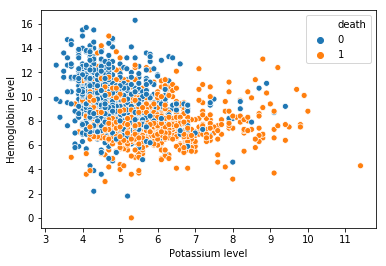

In [5]:
sns.scatterplot(x=df_best['50971_max'],y=df_best['51222_min'],hue=df_best['death'],data=df_best,facecolors=df_best['color'])
plt.xlabel('Potassium level')
plt.ylabel('Hemoglobin level')
# plt.savefig("temp")
# plt.close()

In [6]:
from matplotlib.colors import ListedColormap

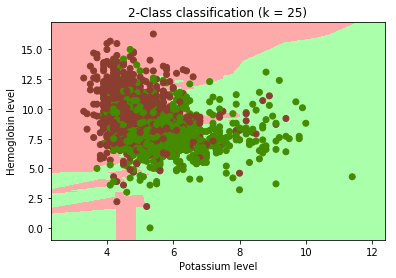

In [7]:
X = df_best.iloc[:,:2].values
Y = df_best.iloc[:,2].values

h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

knn.fit(X, Y)

n_neighbors = 25
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#8B3E2F', '#458B00'])

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# predict class using data and kNN classifier
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (n_neighbors))
plt.xlabel('Potassium level')
plt.ylabel('Hemoglobin level')

# plt.savefig("knn_boundry.png")
# plt.close()

plt.show()

In [30]:
type(X)

numpy.ndarray

In [17]:
x_data =df.iloc[:,1:df.shape[1]-1]
x_scaled = pd.DataFrame(preprocessing.StandardScaler().fit(x_data).transform(x_data))
x_scaled.columns = x_data.columns
df.iloc[:,1:df.shape[1]-1] = x_scaled
df.head(10)

/opt/python3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/python3/lib/python3.4/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,subject_id,age,urea_n_min,urea_n_max,urea_n_mean,resprate_min,resprate_max,resprate_mean,glucose_min,glucose_max,...,oasis,lods,gender_F,gender_M,marital_status_DIVORCED,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_WIDOWED,death
0,15057,-0.427763,-0.057777,-0.039001,-0.005389,-0.089350,2.350555,0.221061,-0.820743,1.875183,...,0.472392,0.469148,-0.879837,0.879837,-0.272742,0.957233,-0.11272,-0.545847,-0.432415,1
1,79262,0.964170,-0.513570,-0.806411,-0.682387,0.180491,-0.087169,-0.167187,0.904299,1.318367,...,1.812103,-0.105944,-0.879837,0.879837,-0.272742,0.957233,-0.11272,-0.545847,-0.432415,1
2,77191,0.810492,-0.057777,0.623763,0.498632,2.609057,-0.087169,1.784921,-0.057744,-0.244627,...,0.297647,0.660846,1.136574,-1.136574,3.666463,-1.044677,-0.11272,-0.545847,-0.432415,0
3,84966,1.368141,-0.665501,-0.387824,-0.457333,-0.089350,2.234473,-0.425988,0.008604,0.566176,...,0.938379,-0.105944,1.136574,-1.136574,-0.272742,-1.044677,-0.11272,1.832014,-0.432415,1
4,94997,1.476134,1.613463,0.344705,0.860990,-1.708394,0.957569,1.955531,-0.986612,-0.762369,...,0.297647,0.277451,1.136574,-1.136574,-0.272742,-1.044677,-0.11272,1.832014,-0.432415,0
5,83430,0.361084,3.588565,3.170172,3.698716,0.180491,-0.435416,-0.582548,-0.090918,-0.381389,...,-0.634325,0.277451,1.136574,-1.136574,-0.272742,-1.044677,-0.11272,1.832014,-0.432415,0
6,12325,-0.447806,-0.893397,-0.492471,-0.837241,-0.359190,-0.667580,-1.244412,-1.351525,0.605251,...,-0.168339,-0.489339,-0.879837,0.879837,-0.272742,0.957233,-0.11272,-0.545847,-0.432415,0
7,93025,1.476134,2.449083,1.042351,1.689974,-0.629031,0.261077,-0.461137,-0.953439,0.243809,...,1.462614,1.427635,-0.879837,0.879837,-0.272742,-1.044677,-0.11272,-0.545847,2.312592,1
8,32138,-1.415304,-1.045328,-1.224999,-1.246056,0.720172,-0.435416,0.151016,-0.489004,-0.752600,...,0.530641,-0.105944,1.136574,-1.136574,-0.272742,-1.044677,-0.11272,1.832014,-0.432415,0
9,2056,0.376310,-0.969363,-0.492471,-0.683554,0.450332,-0.087169,1.067861,1.866341,0.556407,...,-0.284836,0.660846,1.136574,-1.136574,-0.272742,0.957233,-0.11272,-0.545847,-0.432415,0


In [37]:
top_features=['51222_min', '50971_max', '50804_max', '50931_max',
       '51250_var', '51256_max','51006_min', '50971_var','death']

df_top=df[top_features]

top_features_label=['Hemoglobin', 'Potassium max', 'CO2', 'Glucose', 'MCV',
       'Neutrophils', 'Urea Nitrogen', 'Potassium var','death']
df_top.columns=top_features_label

df_death = df_top[df_top['death']==0]
df_alive = df_top[df_top['death']==1]

In [39]:

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

fig = plt.figure()
fig.subplots_adjust(hspace=.5)
for i in range(len(top_features_label[0:8])):
    ax = plt.subplot(2, 4, i+1 )
    sns.distplot(df_death[top_features_label[i]],hist=False)
    sns.distplot(df_alive[top_features_label[i]],hist=False)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)

plt.savefig("top_features")
plt.close()


No handles with labels found to put in legend.


<Figure size 1600x1600 with 0 Axes>